In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import csv
from sklearn import svm
import sklearn.feature_extraction.text
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from sklearn import preprocessing
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

plt.ioff()
pd.set_option('display.max_columns', None)

## Download data from https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [2]:
data_frame = pd.read_csv('data/Tweets.csv')

In [3]:
print("{} Tweets in dataset".format(len(data_frame)))
data_frame.head()

14640 Tweets in dataset


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets_text = data_frame['text']
tweets_sentiment = data_frame['airline_sentiment']

In [5]:
print("Tweet: {}".format(tweets_text[18]))
print("Sentiment: {}".format(tweets_sentiment[18]))

print ""
print("Tweet: {}".format(tweets_text[17]))
print("Sentiment: {}".format(tweets_sentiment[17]))

Tweet: I ❤️ flying @VirginAmerica. ☺️👍
Sentiment: positive

Tweet: @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!
Sentiment: negative


In [6]:
print("Tweet: {}".format(tweets_text[3]))
print("Sentiment: {}".format(tweets_sentiment[3]))

Tweet: @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
Sentiment: negative


In [7]:
ngram_size = 2
small_tweets = tweets_text[:5]
# print(test_tweets)
vect = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(0,ngram_size))
vect.fit(small_tweets)
small_vocab = {i:v for i,v in enumerate(vect.get_feature_names())}
small_bow = vect.transform(small_tweets).toarray()
print('N-grams vocab Small:')
print(small_vocab)
print('Bag Of Words Representations Small')
print(small_bow)

N-grams vocab Small:
{0: u'', 1: u'about', 2: u'about it', 3: u'added', 4: u'added commercials', 5: u'aggressive', 6: u'aggressive to', 7: u'amp', 8: u'amp they', 9: u'and', 10: u'and it', 11: u'another', 12: u'another trip', 13: u'bad', 14: u'bad thing', 15: u'big', 16: u'big bad', 17: u'blast', 18: u'blast obnoxious', 19: u'commercials', 20: u'commercials to', 21: u'dhepburn', 22: u'dhepburn said', 23: u'didn', 24: u'didn today', 25: u'entertainment', 26: u'entertainment in', 27: u'experience', 28: u'experience tacky', 29: u'faces', 30: u'faces amp', 31: u'guests', 32: u'guests faces', 33: u'have', 34: u'have little', 35: u'in', 36: u'in your', 37: u'it', 38: u'it really', 39: u'little', 40: u'little recourse', 41: u'mean', 42: u'mean need', 43: u'must', 44: u'must mean', 45: u'need', 46: u'need to', 47: u'obnoxious', 48: u'obnoxious entertainment', 49: u'plus', 50: u'plus you', 51: u'really', 52: u'really aggressive', 53: u'really big', 54: u'recourse', 55: u'said', 56: u'tacky', 57

In [8]:
# Naive approach
ngram_size = 4
vect = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(0,ngram_size))
vect.fit(tweets_text)
vocab = {i:v for i,v in enumerate(vect.get_feature_names())}
bow = vect.transform(tweets_text)
print('N-grams vocab size:')
print(len(vocab))
print('Bag Of Words Representations Shape')
print(bow.shape)

N-grams vocab size:
483200
Bag Of Words Representations Shape
(14640, 483200)


In [9]:
# Better approach
ngram_size = 4
vect = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(0,ngram_size), max_df=0.9, min_df=0.001, stop_words='english')
vect.fit(tweets_text)
vocab = {i:v for i,v in enumerate(vect.get_feature_names())}
bow = vect.transform(tweets_text)
transformer = sklearn.feature_extraction.text.TfidfTransformer()
bow = transformer.fit_transform(bow)
print('N-grams vocab size:')
print(len(vocab))
print('Bag Of Words Representations Shape')
print(bow.shape)
print()
print(vocab)

N-grams vocab size:
1605
Bag Of Words Representations Shape
(14640, 1605)
()
{0: u'000', 1: u'10', 2: u'10 minutes', 3: u'100', 4: u'11', 5: u'12', 6: u'13', 7: u'14', 8: u'15', 9: u'150', 10: u'16', 11: u'17', 12: u'18', 13: u'19', 14: u'1hr', 15: u'1k', 16: u'1st', 17: u'1st class', 18: u'20', 19: u'20 min', 20: u'20 minutes', 21: u'200', 22: u'2015', 23: u'21', 24: u'22', 25: u'23', 26: u'24', 27: u'24 hours', 28: u'24 hrs', 29: u'25', 30: u'27', 31: u'2hrs', 32: u'2nd', 33: u'2nd time', 34: u'30', 35: u'30 min', 36: u'30 mins', 37: u'30 minutes', 38: u'35', 39: u'3rd', 40: u'40', 41: u'40 min', 42: u'40 minutes', 43: u'45', 44: u'45 min', 45: u'45 mins', 46: u'45 minutes', 47: u'50', 48: u'500', 49: u'60', 50: u'728', 51: u'75', 52: u'800', 53: u'800 number', 54: u'90', 55: u'aa', 56: u'able', 57: u'absolute', 58: u'absolutely', 59: u'accept', 60: u'acceptable', 61: u'access', 62: u'accommodate', 63: u'account', 64: u'act', 65: u'actual', 66: u'actually', 67: u'add', 68: u'added', 

In [10]:
X = bow
y_mapping = {'negative':-1, 'neutral':0, 'positive':1}
y_list = [y_mapping[sentiment.lower()] for sentiment in tweets_sentiment]
X = bow.toarray()
y = np.array(y_list)
print(y_list.count(-1), y_list.count(0), y_list.count(1))

(9178, 3099, 2363)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=1/4., random_state=1)
print(X_train.shape)
print(Y_train.shape)

(10980, 1605)
(10980,)


In [12]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

train_accuracy = sklearn.metrics.accuracy_score(Y_train, Y_train_pred)
test_accuracy = sklearn.metrics.accuracy_score(Y_test, Y_test_pred)
print("Train Accuracy {}%".format(train_accuracy*100.0))
print("Test Accuracy {}%".format(test_accuracy*100))

cf_matrix = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix")
print(cf_matrix)

Train Accuracy 96.912568306%
Test Accuracy 73.4699453552%
Confusion Matrix
[[2120  112   59]
 [ 449  254   71]
 [ 200   80  315]]


In [13]:
# adapted from:
# https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

Normalized confusion matrix
[[ 0.9253601   0.04888695  0.02575295]
 [ 0.58010336  0.32816537  0.09173127]
 [ 0.33613445  0.13445378  0.52941176]]


<IPython.core.display.Javascript object>


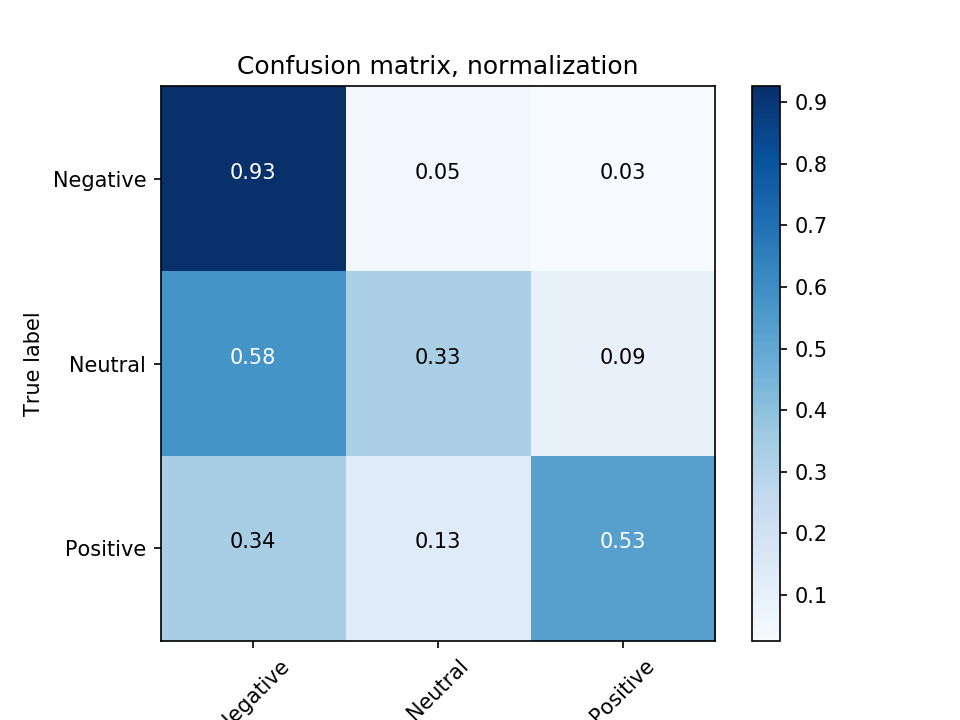

In [14]:
plot_confusion_matrix(cf_matrix, classes=["Negative", "Neutral", "Positive"],
                      title='Confusion matrix, normalization', normalize=True)
plt.show()